In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as plt
import matplotlib
import plotly.express as px
import seaborn as sns
from sklearn.metrics import confusion_matrix

C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Import models to train data
import sklearn
from sklearn.metrics import classification_report, PrecisionRecallDisplay, RocCurveDisplay, accuracy_score, f1_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [3]:
data = pd.read_csv('C:/Users/USER/Downloads/Book1(1).csv')

In [4]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for x in data.columns:
    data[x]=enc.fit_transform(data[x])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   age                        3772 non-null   int64
 1   sex                        3772 non-null   int32
 2   on thyroxine               3772 non-null   int32
 3   query on thyroxine         3772 non-null   int32
 4   on antithyroid medication  3772 non-null   int32
 5   sick                       3772 non-null   int32
 6   pregnant                   3772 non-null   int32
 7   thyroid surgery            3772 non-null   int32
 8   I131 treatment             3772 non-null   int32
 9   query hypothyroid          3772 non-null   int32
 10  query hyperthyroid         3772 non-null   int32
 11  lithium                    3772 non-null   int32
 12  goitre                     3772 non-null   int32
 13  tumor                      3772 non-null   int32
 14  hypopituitary           

In [5]:
y=data['binaryClass']
x=data.drop(['binaryClass'],axis=1)

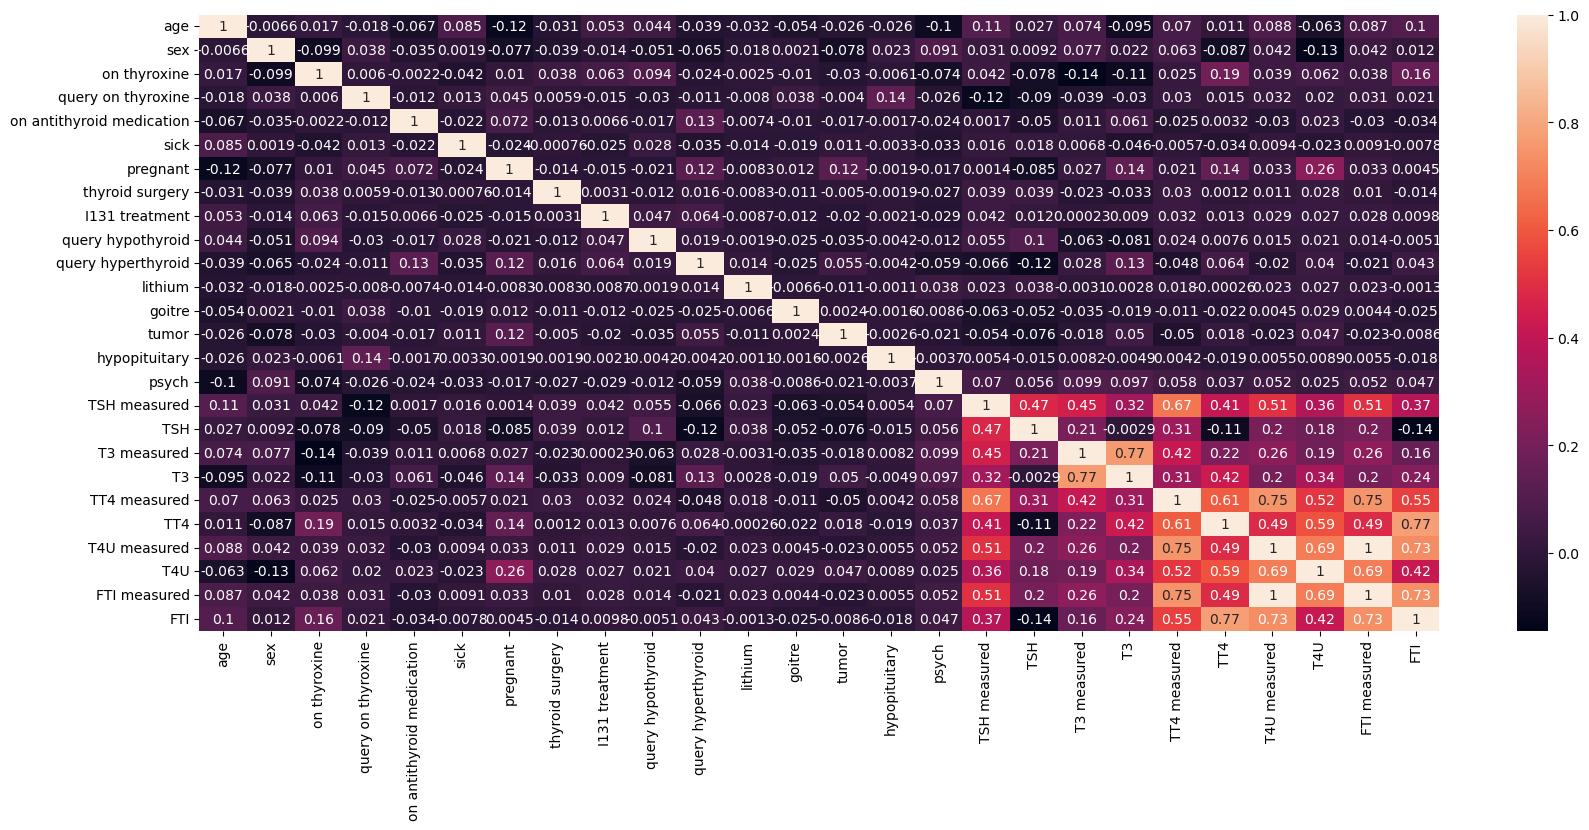

In [6]:
import matplotlib.pyplot as plt
corr_mat = x.corr()
fig, ax = plt.subplots(figsize=(20, 8))

sns.heatmap(data=corr_mat, ax=ax, annot=True)
plt.show()

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

                      feature          VIF
0                         age     8.184268
1                         sex     1.647187
2                on thyroxine     1.279776
3          query on thyroxine     1.080715
4   on antithyroid medication     1.043379
5                        sick     1.059354
6                    pregnant     1.186259
7             thyroid surgery     1.028858
8              I131 treatment     1.035491
9           query hypothyroid     1.105896
10         query hyperthyroid     1.144024
11                    lithium     1.010510
12                     goitre     1.023528
13                      tumor     1.055247
14              hypopituitary     1.025723
15                      psych     1.101228
16               TSH measured    25.181180
17                        TSH     5.584785
18                T3 measured    41.830259
19                         T3     9.698992
20               TT4 measured   182.747050
21                        TT4   173.418236
22         

In [8]:
y=data['binaryClass']
x=data.drop(['binaryClass','TSH measured','T3 measured','TT4 measured','TT4','T4U measured','T4U','FTI measured','FTI'],axis=1)

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

                      feature       VIF
0                         age  3.773088
1                         sex  1.508775
2                on thyroxine  1.153193
3          query on thyroxine  1.043711
4   on antithyroid medication  1.036012
5                        sick  1.055886
6                    pregnant  1.080077
7             thyroid surgery  1.019829
8              I131 treatment  1.030915
9           query hypothyroid  1.102421
10         query hyperthyroid  1.135070
11                    lithium  1.009054
12                     goitre  1.008956
13                      tumor  1.051931
14              hypopituitary  1.021213
15                      psych  1.089536
16                        TSH  2.757039
17                         T3  2.842295


In [10]:
from sklearn.model_selection import train_test_split
  
xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.30, random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
  
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)
  
print (xtrain)

[[-0.13941218  1.38810276 -0.37205071 ... -0.21630595 -1.16516192
  -0.29905908]
 [ 0.07385634 -0.72040776 -0.37205071 ... -0.21630595  0.39974564
   0.48023942]
 [-0.45931495 -0.72040776 -0.37205071 ... -0.21630595  0.41587871
  -1.51130118]
 ...
 [ 0.34044199  1.38810276 -0.37205071 ... -0.21630595  0.73854006
   0.04729581]
 [-0.61926634 -0.72040776 -0.37205071 ... -0.21630595  0.56107631
   0.74000558]
 [-0.7259006   1.38810276  2.68780562 ... -0.21630595 -1.01996431
   0.3936507 ]]


# LogisticRegression

In [12]:
from statsmodels.tools import add_constant as add_constant
data_constant = add_constant(x)
data_constant.head()

,const,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3
0,1.0,20,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,66,17
1,1.0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,109,22
2,1.0,91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,137,0
3,1.0,91,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,14
4,1.0,90,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,125,5


In [13]:
import statsmodels.api as sm
import scipy.stats as st
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=data_constant.columns[:-1]
model=sm.Logit(data.binaryClass,data_constant[cols])
result=model.fit()
result.summary()

         Current function value: 0.042803
         Iterations: 35


K:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            binaryClass   No. Observations:                 3772
Model:                          Logit   Df Residuals:                     3754
Method:                           MLE   Df Model:                           17
Date:                Fri, 05 Jul 2024   Pseudo R-squ.:                  0.8425
Time:                        07:22:48   Log-Likelihood:                -161.45
converged:                      False   LL-Null:                       -1025.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        19.3418      1.296     14.925      0.000      16.802      21.882
age                           0.0025      0.008      0.317      0.752      -0.013       0.018
sex                           0.3376      0.351      0.963      0.335      -0.349       1.025
on thyroxine                  9.1604      0.970      9.448      0.000       7.260      11.061
query on thyroxine            0.5367      1.677      0.320      0.749      -2.750       3.823
on antithyroid medication     4.3093      2.591      1.663      0.096      -0.769       9.388
sick                         -0.0617      0.696     -0.089      0.929      -1.426       1.302
pregnant                     14.7451   7407.868      0.002      0.998   -1.45e+04    1.45e+04
thyroid surgery              10.9531      1.508      7.265      0.000       7.998      13.908
I131 treatment                0.2361      0.927      0.255      0.799      -1.581       2.054
query hypothyroid            -0.1697      0.536     -0.316      0.752      -1.221       0.882
query hyperthyroid            0.1721      0.781      0.220      0.826      -1.358       1.702
lithium                       0.8124      1.480      0.549      0.583      -2.089       3.714
goitre                        7.5313    192.089      0.039      0.969    -368.955     384.018
tumor                        -0.4379      1.049     -0.417      0.676      -2.494       1.619
hypopituitary                 4.8720   4.61e+04      0.000      1.000   -9.04e+04    9.04e+04
psych                        -0.1217      0.753     -0.162      0.872      -1.597       1.353
TSH                          -0.1179      0.008    -14.968      0.000      -0.133      -0.102
=============================================================================================

Possibly complete quasi-separation: A fraction 0.47 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

import scipy.stats as st
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=data_constant.columns[:-1]
model=sm.Logit(data.binaryClass,data_constant[cols])
result=model.fit()
result.summary()

In [14]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [15]:
y_pred = classifier.predict(xtest)

Confusion Matrix : 
 [[  73   13]
 [  10 1036]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        86
           1       0.99      0.99      0.99      1046

    accuracy                           0.98      1132
   macro avg       0.93      0.92      0.93      1132
weighted avg       0.98      0.98      0.98      1132



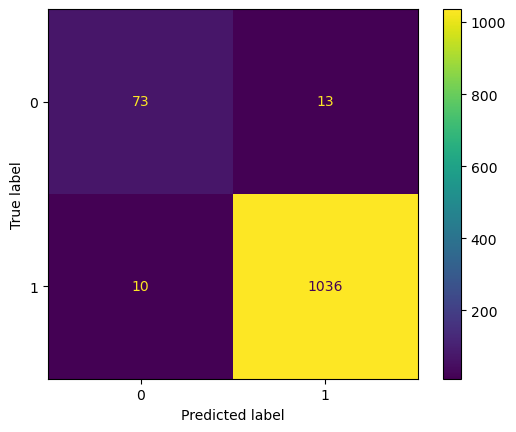

In [16]:
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)
print(classification_report(ytest, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

In [17]:
from sklearn import metrics
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
accuracy= (TP+TN)/float(TP+TN+FP+FN)
precision=metrics.precision_score(ytest, y_pred,average='macro')
recall=metrics.recall_score(ytest, y_pred,average='macro')
f1_score=metrics.f1_score(ytest, y_pred,average='macro')

In [18]:
lr_data =[accuracy,f1_score,precision,recall,sensitivity,specificity]
lr_values = ['Accuracy','F1_score','Precision','Recall','Sensitivity','Specificity']
lr_datas=zip(lr_values,lr_data)
lr_result = pd.DataFrame(lr_data,columns=['values'],index=lr_values)
lr_result

,values
Accuracy,0.979682
F1_score,0.926463
Precision,0.933563
Recall,0.919638
Sensitivity,0.990440
Specificity,0.848837


In [19]:
import pickle 
with open(r"filename.pkl",'wb') as file:
    pickle.dump(classifier,file)
print(f"model saved logistic_regression.pkl")

model saved logistic_regression.pkl


In [21]:
with open(r"filename.pkl",'rb') as file:
    load_model = pickle.load(file)
print(f"Picklefile_loaded")

Picklefile_loaded


In [22]:
load_model.predict(xtest)

array([1, 0, 1, ..., 1, 1, 1])

# RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier 
rf=RandomForestClassifier(n_estimators=10)
rf.fit(xtrain,ytrain)

y_pred1 = rf.predict(xtest)

Confusion Matrix : 
 [[  81    5]
 [   9 1037]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        86
           1       1.00      0.99      0.99      1046

    accuracy                           0.99      1132
   macro avg       0.95      0.97      0.96      1132
weighted avg       0.99      0.99      0.99      1132



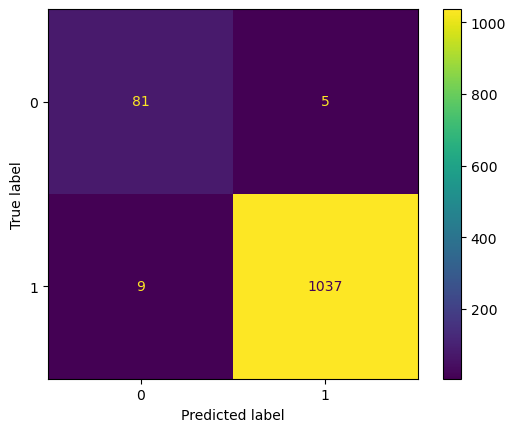

In [38]:
cm1 = confusion_matrix(ytest, y_pred1)
print ("Confusion Matrix : \n", cm1)
print(classification_report(ytest, y_pred1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=rf.classes_)
disp.plot()

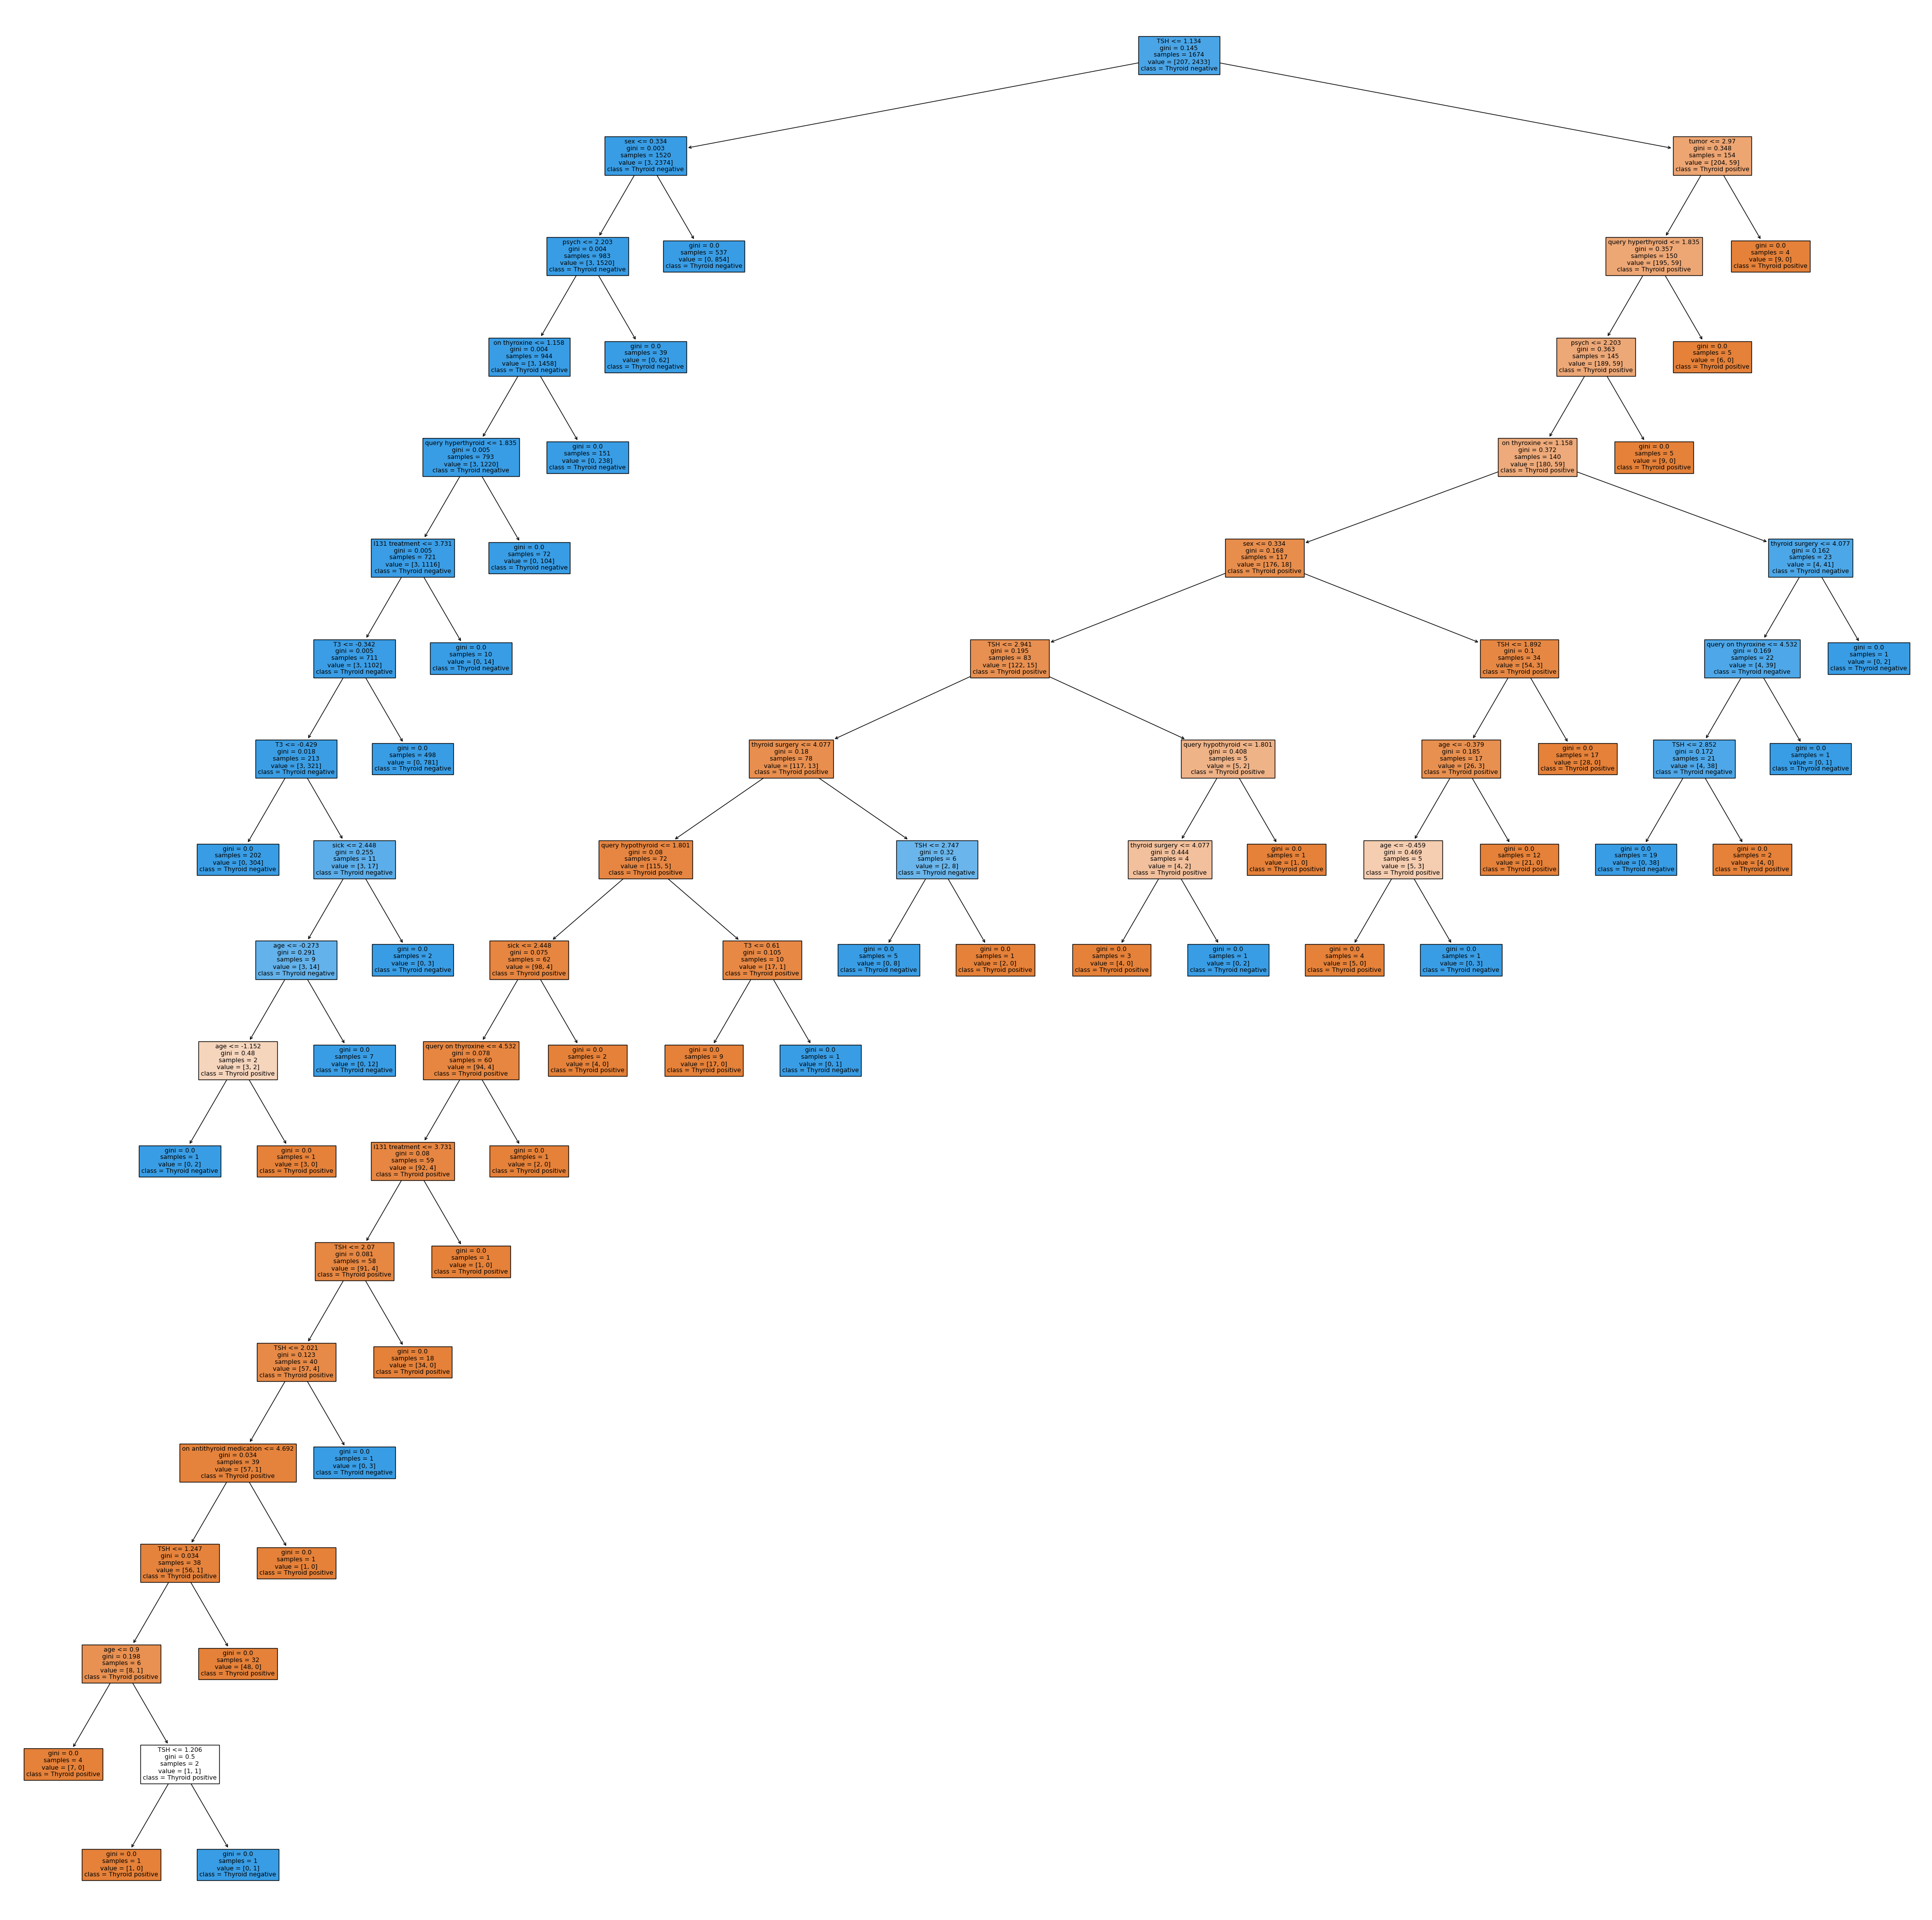

In [39]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import tree
plt.figure(figsize=(50,50))
features = x.columns
classes = ['Thyroid positive','Thyroid negative']
single_tree=rf.estimators_[5]
tree.plot_tree(single_tree,feature_names=features,class_names=classes,filled=True)
plt.show()

In [40]:
from sklearn import metrics
rf_TN=cm1[0,0]
rf_TP=cm1[1,1]
rf_FN=cm1[1,0]
rf_FP=cm1[0,1]
rf_sensitivity=rf_TP/float(rf_TP+rf_FN)
rf_specificity=rf_TN/float(rf_TN+rf_FP)
rf_accuracy= (rf_TP+rf_TN)/float(rf_TP+rf_TN+rf_FP+rf_FN)
rf_precision=metrics.precision_score(ytest, y_pred1,average='macro')
rf_recall=metrics.recall_score(ytest, y_pred1,average='macro')
rf_f1_score=metrics.f1_score(ytest, y_pred1,average='macro')

In [41]:
rf_data =[rf_accuracy,rf_f1_score,rf_precision,rf_recall,rf_sensitivity,rf_specificity]
rf_values = ['Accuracy','F1_score','Precision','Recall','Sensitivity','Specificity']
rf_datas=zip(rf_values,rf_data)
rf_result = pd.DataFrame(rf_data,columns=['values'],index=rf_values)
rf_result

,values
Accuracy,0.987633
F1_score,0.956875
Precision,0.947601
Recall,0.966628
Sensitivity,0.991396
Specificity,0.941860


# DecisionTreeClassifie

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(random_state = 0)
dt.fit(xtrain,ytrain)

y_pred2 = dt.predict(xtest)

Confusion Matrix : 
 [[  77    9]
 [   7 1039]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        86
           1       0.99      0.99      0.99      1046

    accuracy                           0.99      1132
   macro avg       0.95      0.94      0.95      1132
weighted avg       0.99      0.99      0.99      1132



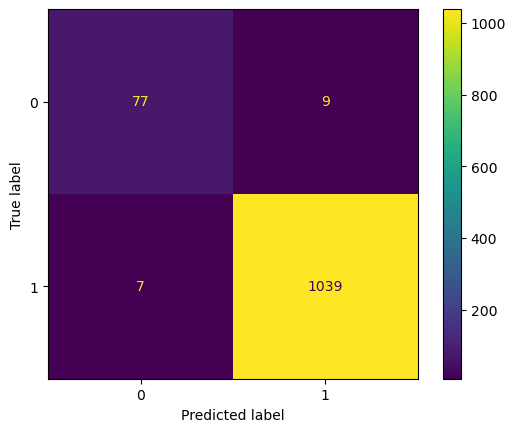

In [43]:
cm2 = confusion_matrix(ytest, y_pred2)
print ("Confusion Matrix : \n", cm2)
print(classification_report(ytest, y_pred2))
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=dt.classes_)
disp1.plot()

In [44]:
from sklearn import metrics
dt_TN=cm2[0,0]
dt_TP=cm2[1,1]
dt_FN=cm2[1,0]
dt_FP=cm2[0,1]
dt_sensitivity=dt_TP/float(dt_TP+dt_FN)
dt_specificity=dt_TN/float(dt_TN+dt_FP)
dt_accuracy= (dt_TP+dt_TN)/float(dt_TP+dt_TN+dt_FP+dt_FN)
dt_precision=metrics.precision_score(ytest, y_pred2,average='macro')
dt_recall=metrics.recall_score(ytest, y_pred2,average='macro')
dt_f1_score=metrics.f1_score(ytest, y_pred2,average='macro')

In [45]:
dt_data =[dt_accuracy,dt_f1_score,dt_precision,dt_recall,dt_sensitivity,dt_specificity]
dt_values = ['Accuracy','F1_score','Precision','Recall','Sensitivity','Specificity']
dt_datas=zip(dt_values,dt_data)
dt_result = pd.DataFrame(dt_data,columns=['values'],index=dt_values)
dt_result

,values
Accuracy,0.985866
F1_score,0.949121
Precision,0.954039
Recall,0.944328
Sensitivity,0.993308
Specificity,0.895349


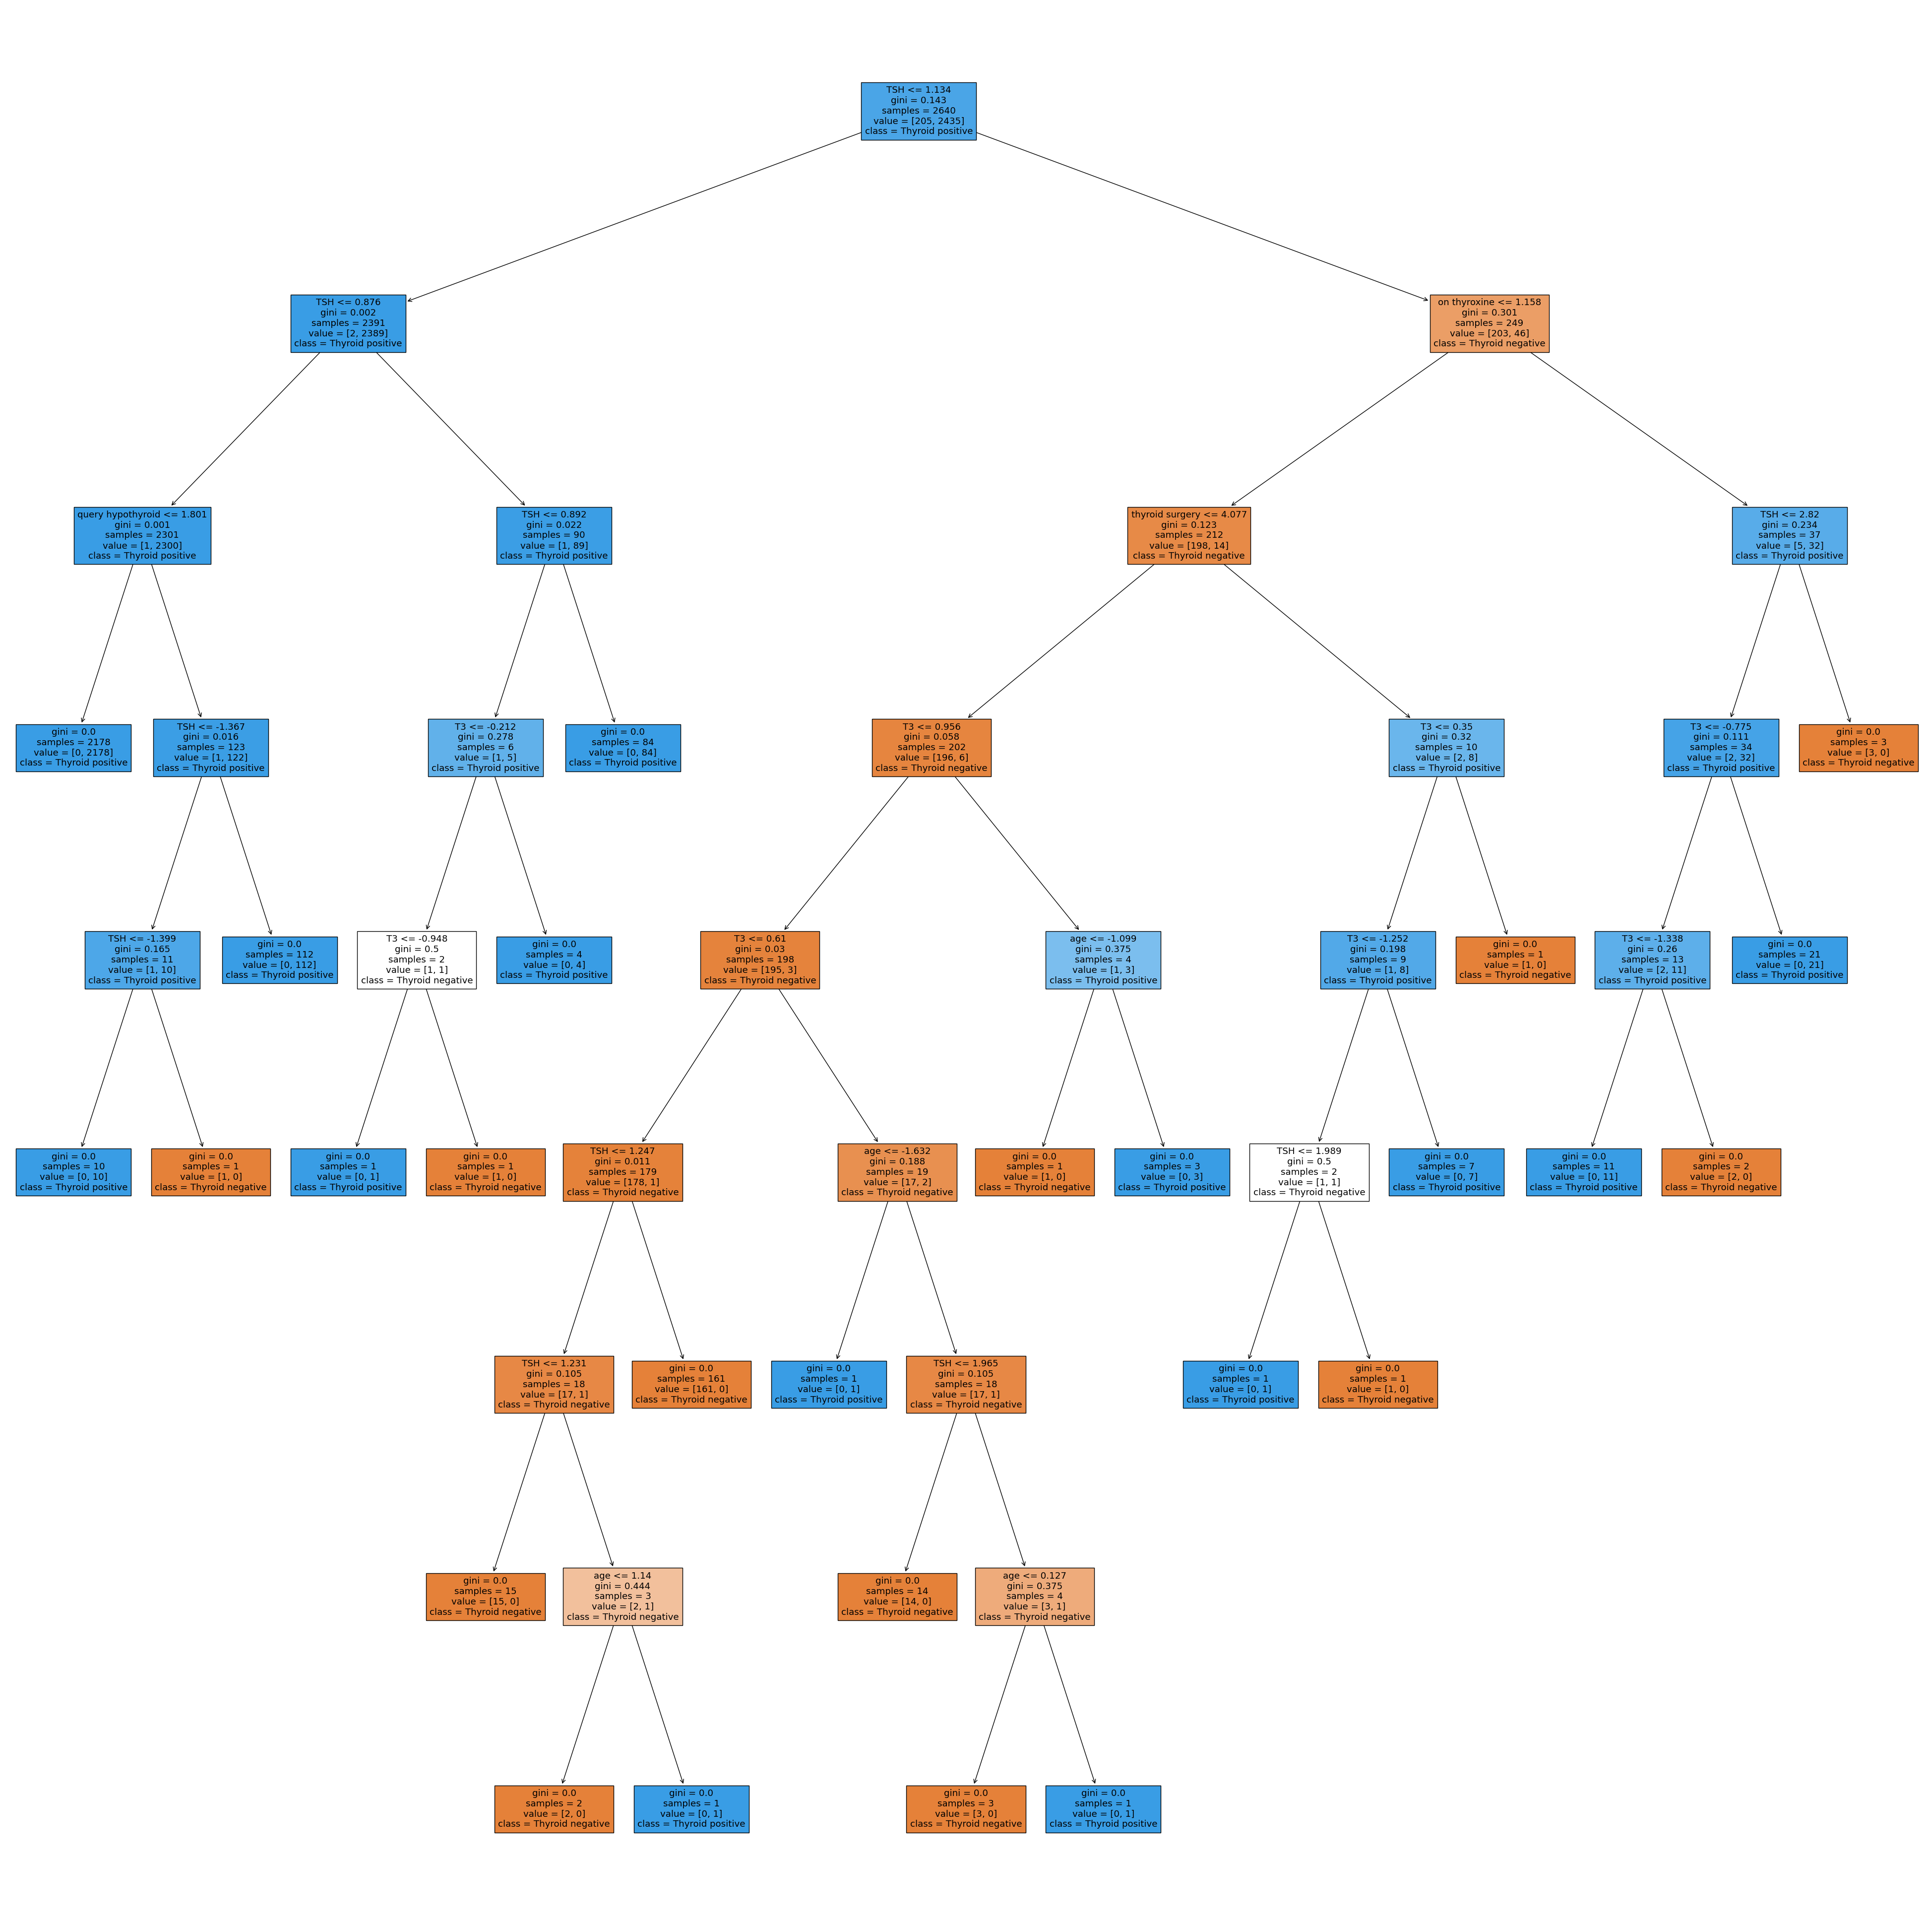

In [46]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import tree
plt.figure(figsize=(50,50))
features = x.columns
classes = ['Thyroid negative','Thyroid positive']
tree.plot_tree(dt,feature_names=features,class_names=classes,filled=True)
plt.show()

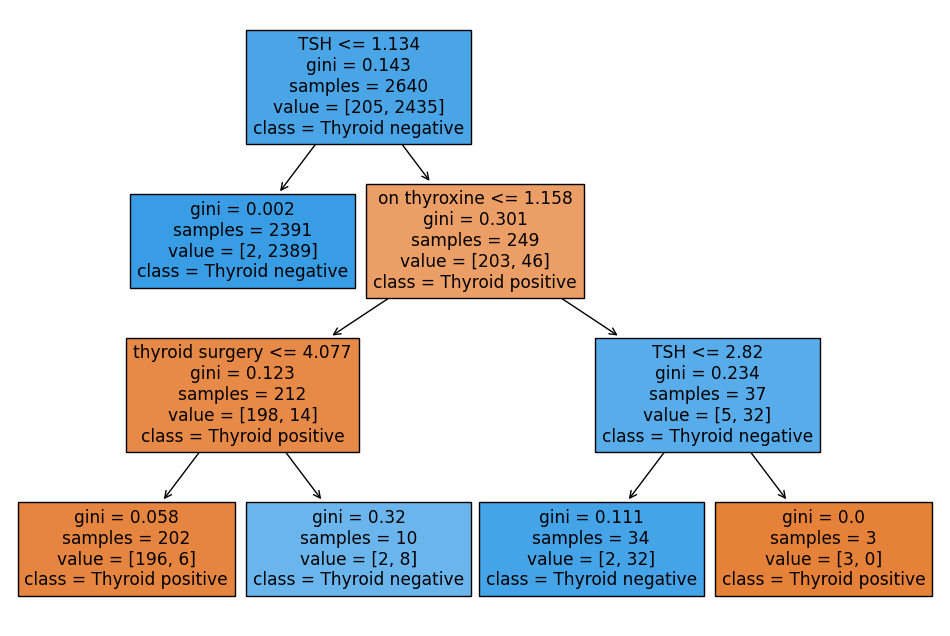

In [47]:
# Prune the decision tree using cost complexity pruning (ccp)
path = dt.cost_complexity_pruning_path(xtrain, ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Find the optimal alpha value for pruning
trees = []
for ccp_alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    pruned_tree.fit(xtrain, ytrain)
    trees.append(pruned_tree)

# Select the best pruned decision tree based on accuracy
accuracies = [tree.score(xtest, ytest) for tree in trees]
best_tree = trees[accuracies.index(max(accuracies))]

# Plot the pruned decision tree
plt.figure(figsize=(12, 8))
classes = ['Thyroid positive','Thyroid negative']
plot_tree(best_tree,feature_names=features,class_names=classes,filled=True)
plt.show()

# Support vector machine

In [48]:
from sklearn.svm import SVC 
ga=SVC()
ga.fit(xtrain,ytrain)

SVC()

In [49]:
y_pred4=ga.predict(xtest)

Confusion Matrix : 
 [[  64   22]
 [   7 1039]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.82        86
           1       0.98      0.99      0.99      1046

    accuracy                           0.97      1132
   macro avg       0.94      0.87      0.90      1132
weighted avg       0.97      0.97      0.97      1132



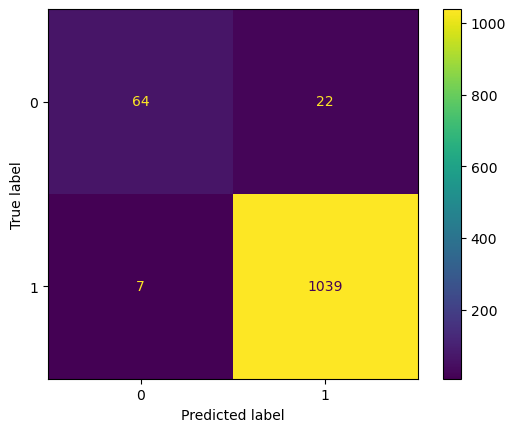

In [50]:
cm4 = confusion_matrix(ytest, y_pred4)
print ("Confusion Matrix : \n", cm4)
print(classification_report(ytest, y_pred4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=ga.classes_)
disp.plot()

In [51]:
from sklearn import metrics
ga_TN=cm4[0,0]
ga_TP=cm4[1,1]
ga_FN=cm4[1,0]
ga_FP=cm4[0,1]
ga_sensitivity=ga_TP/float(ga_TP+ga_FN)
ga_specificity=ga_TN/float(ga_TN+ga_FP)
ga_accuracy= (ga_TP+ga_TN)/float(ga_TP + ga_TN + ga_FP + ga_FN)
ga_precision=metrics.precision_score(ytest, y_pred4,average='macro')
ga_recall=metrics.recall_score(ytest, y_pred4,average='macro')
ga_f1_score=metrics.f1_score(ytest, y_pred4,average='macro')

In [52]:
ga_data =[ga_accuracy,ga_f1_score,ga_precision,ga_recall,ga_sensitivity,ga_specificity]
ga_values = ['Accuracy','F1_score','Precision','Recall','Sensitivity','Specificity']
ga_datas=zip(ga_values,ga_data)
ga_result = pd.DataFrame(ga_data,columns=['values'],index=ga_values)
ga_result

,values
Accuracy,0.974382
F1_score,0.900761
Precision,0.940337
Recall,0.868747
Sensitivity,0.993308
Specificity,0.744186


In [53]:
Result_set = zip(lr_result['values'],rf_result['values'],dt_result['values'],ga_result['values'])
Result = pd.DataFrame(Result_set,columns=['LR','RF','DT','SVM'])
output=Result.T
output.columns
output.columns=['Accuracy','F1_score','Precision','Recall','Sensitivity','Specificity']

In [54]:
output

,Accuracy,F1_score,Precision,Recall,Sensitivity,Specificity
LR,0.979682,0.926463,0.933563,0.919638,0.990440,0.848837
RF,0.987633,0.956875,0.947601,0.966628,0.991396,0.941860
DT,0.985866,0.949121,0.954039,0.944328,0.993308,0.895349
SVM,0.974382,0.900761,0.940337,0.868747,0.993308,0.744186


In [55]:
outputs=output.T

<AxesSubplot:>

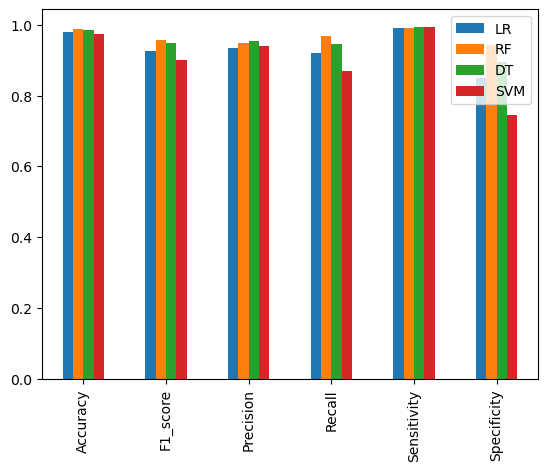

In [56]:
outputs.plot(kind='bar')

<AxesSubplot:>

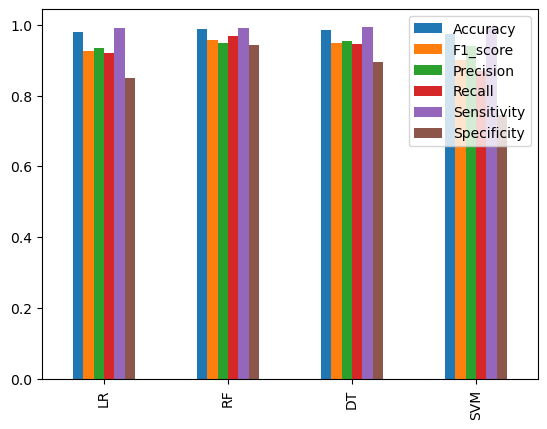

In [57]:
output.plot(kind='bar')

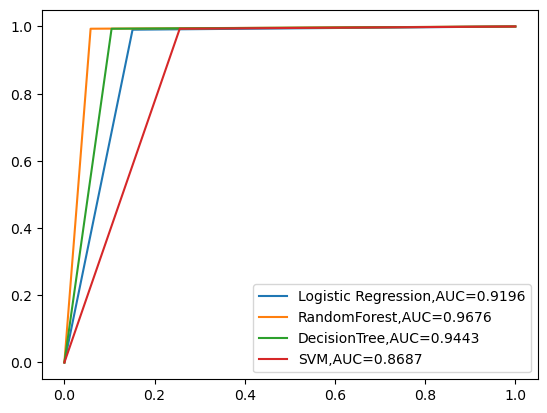

In [44]:
fpr, tpr, _ = metrics.roc_curve(ytest, y_pred)
auc = round(metrics.roc_auc_score(ytest, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression,AUC="+str(auc))
fpr, tpr, _ = metrics.roc_curve(ytest, y_pred1)
auc = round(metrics.roc_auc_score(ytest, y_pred1), 4)
plt.plot(fpr,tpr,label="RandomForest,AUC="+str(auc))
fpr, tpr, _ = metrics.roc_curve(ytest, y_pred2)
auc = round(metrics.roc_auc_score(ytest, y_pred2), 4)
plt.plot(fpr,tpr,label="DecisionTree,AUC="+str(auc))
fpr, tpr, _ = metrics.roc_curve(ytest, y_pred4)
auc = round(metrics.roc_auc_score(ytest, y_pred4), 4)
plt.plot(fpr,tpr,label="SVM,AUC="+str(auc))
#add legend
plt.legend()